## GDP Assignment
### STUDENT NAME : ANUSHKUMAR K

# PART-1A

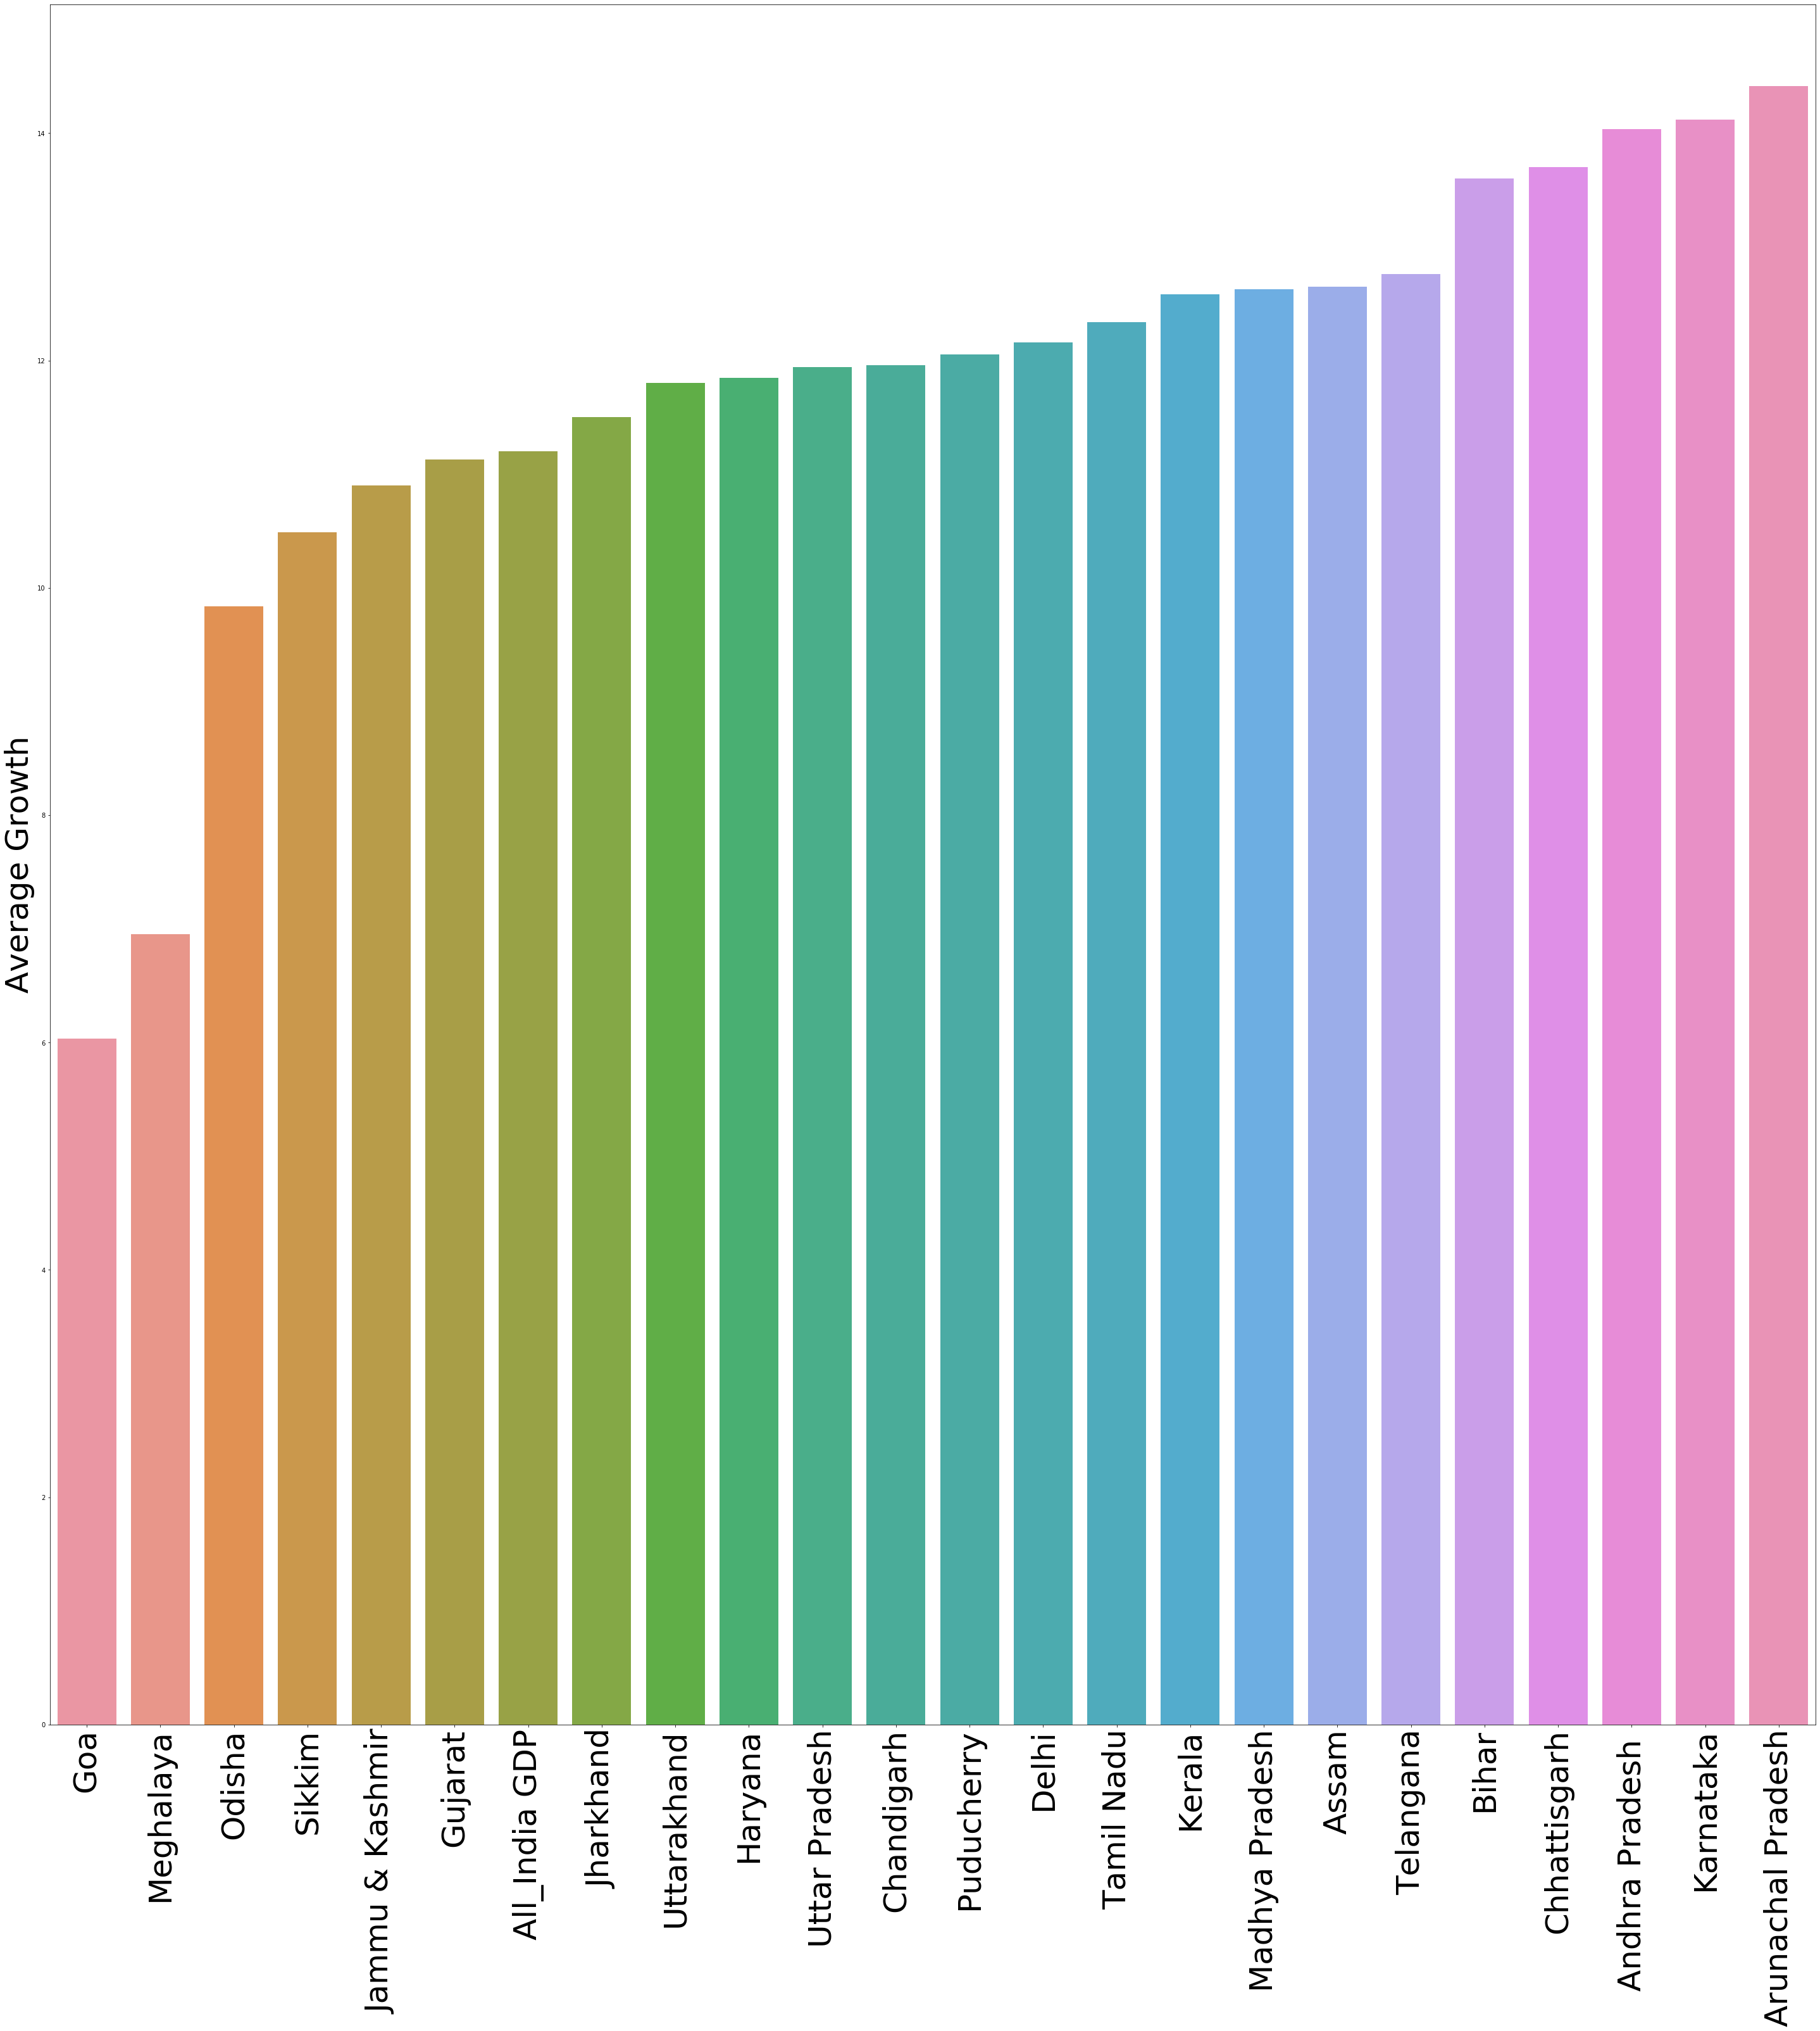

In [413]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the excel file
path=r'C:/Users/Anush/Documents/Python/GDP Analysis/GDP Analysis/State-wise Gross Domestic Product (GDP) at current price on yearly basis.csv'
df=pd.read_csv(path)
#Dropping rows with 2016-17
df=df[~df.Duration.str.contains("2016-17")]
#df=df[~df['Items  Description'].str.contains("(% Growth over previous year)")]
#df=df[~df['Duration'].str.contains("2011-12")]
#df=df[~df['Duration'].str.contains("2012-13")]
df14=df[df.Duration.str.contains("2013-14")]
df15=df[df.Duration.str.contains("2014-15")]
df16=df[df.Duration.str.contains("2015-16")]
dfmean=pd.concat([df14,df15,df16])
dfmean=dfmean[~dfmean['Items  Description'].str.contains("GSDP - CURRENT PRICES")]
dfmean.dropna(axis='columns',inplace=True)
dfmean=dfmean.mean(axis=0)
dfmean=dfmean.to_frame()
dftranspose=dfmean.transpose()
dftranspose.index=['Average Growth']
dftranspose=dftranspose.transpose()
dftranspose=dftranspose.sort_values("Average Growth")
plt.figure(figsize=(50,50))
finalplot=sns.barplot(x=dftranspose.index,y='Average Growth',data=dftranspose)
#finalplot.set_xlabel("States",fontsize=100)
finalplot.set_ylabel("Average Growth",fontsize=50)
finalplot.set_xticklabels(finalplot.get_xticklabels(),rotation=90,fontsize=50)
plt.show()
#plt.savefig('Avg_GDP_States.pdf')

# From the above chart we can infer that Arunachal Pradesh,Karnataka and AP are growing consistently fast.

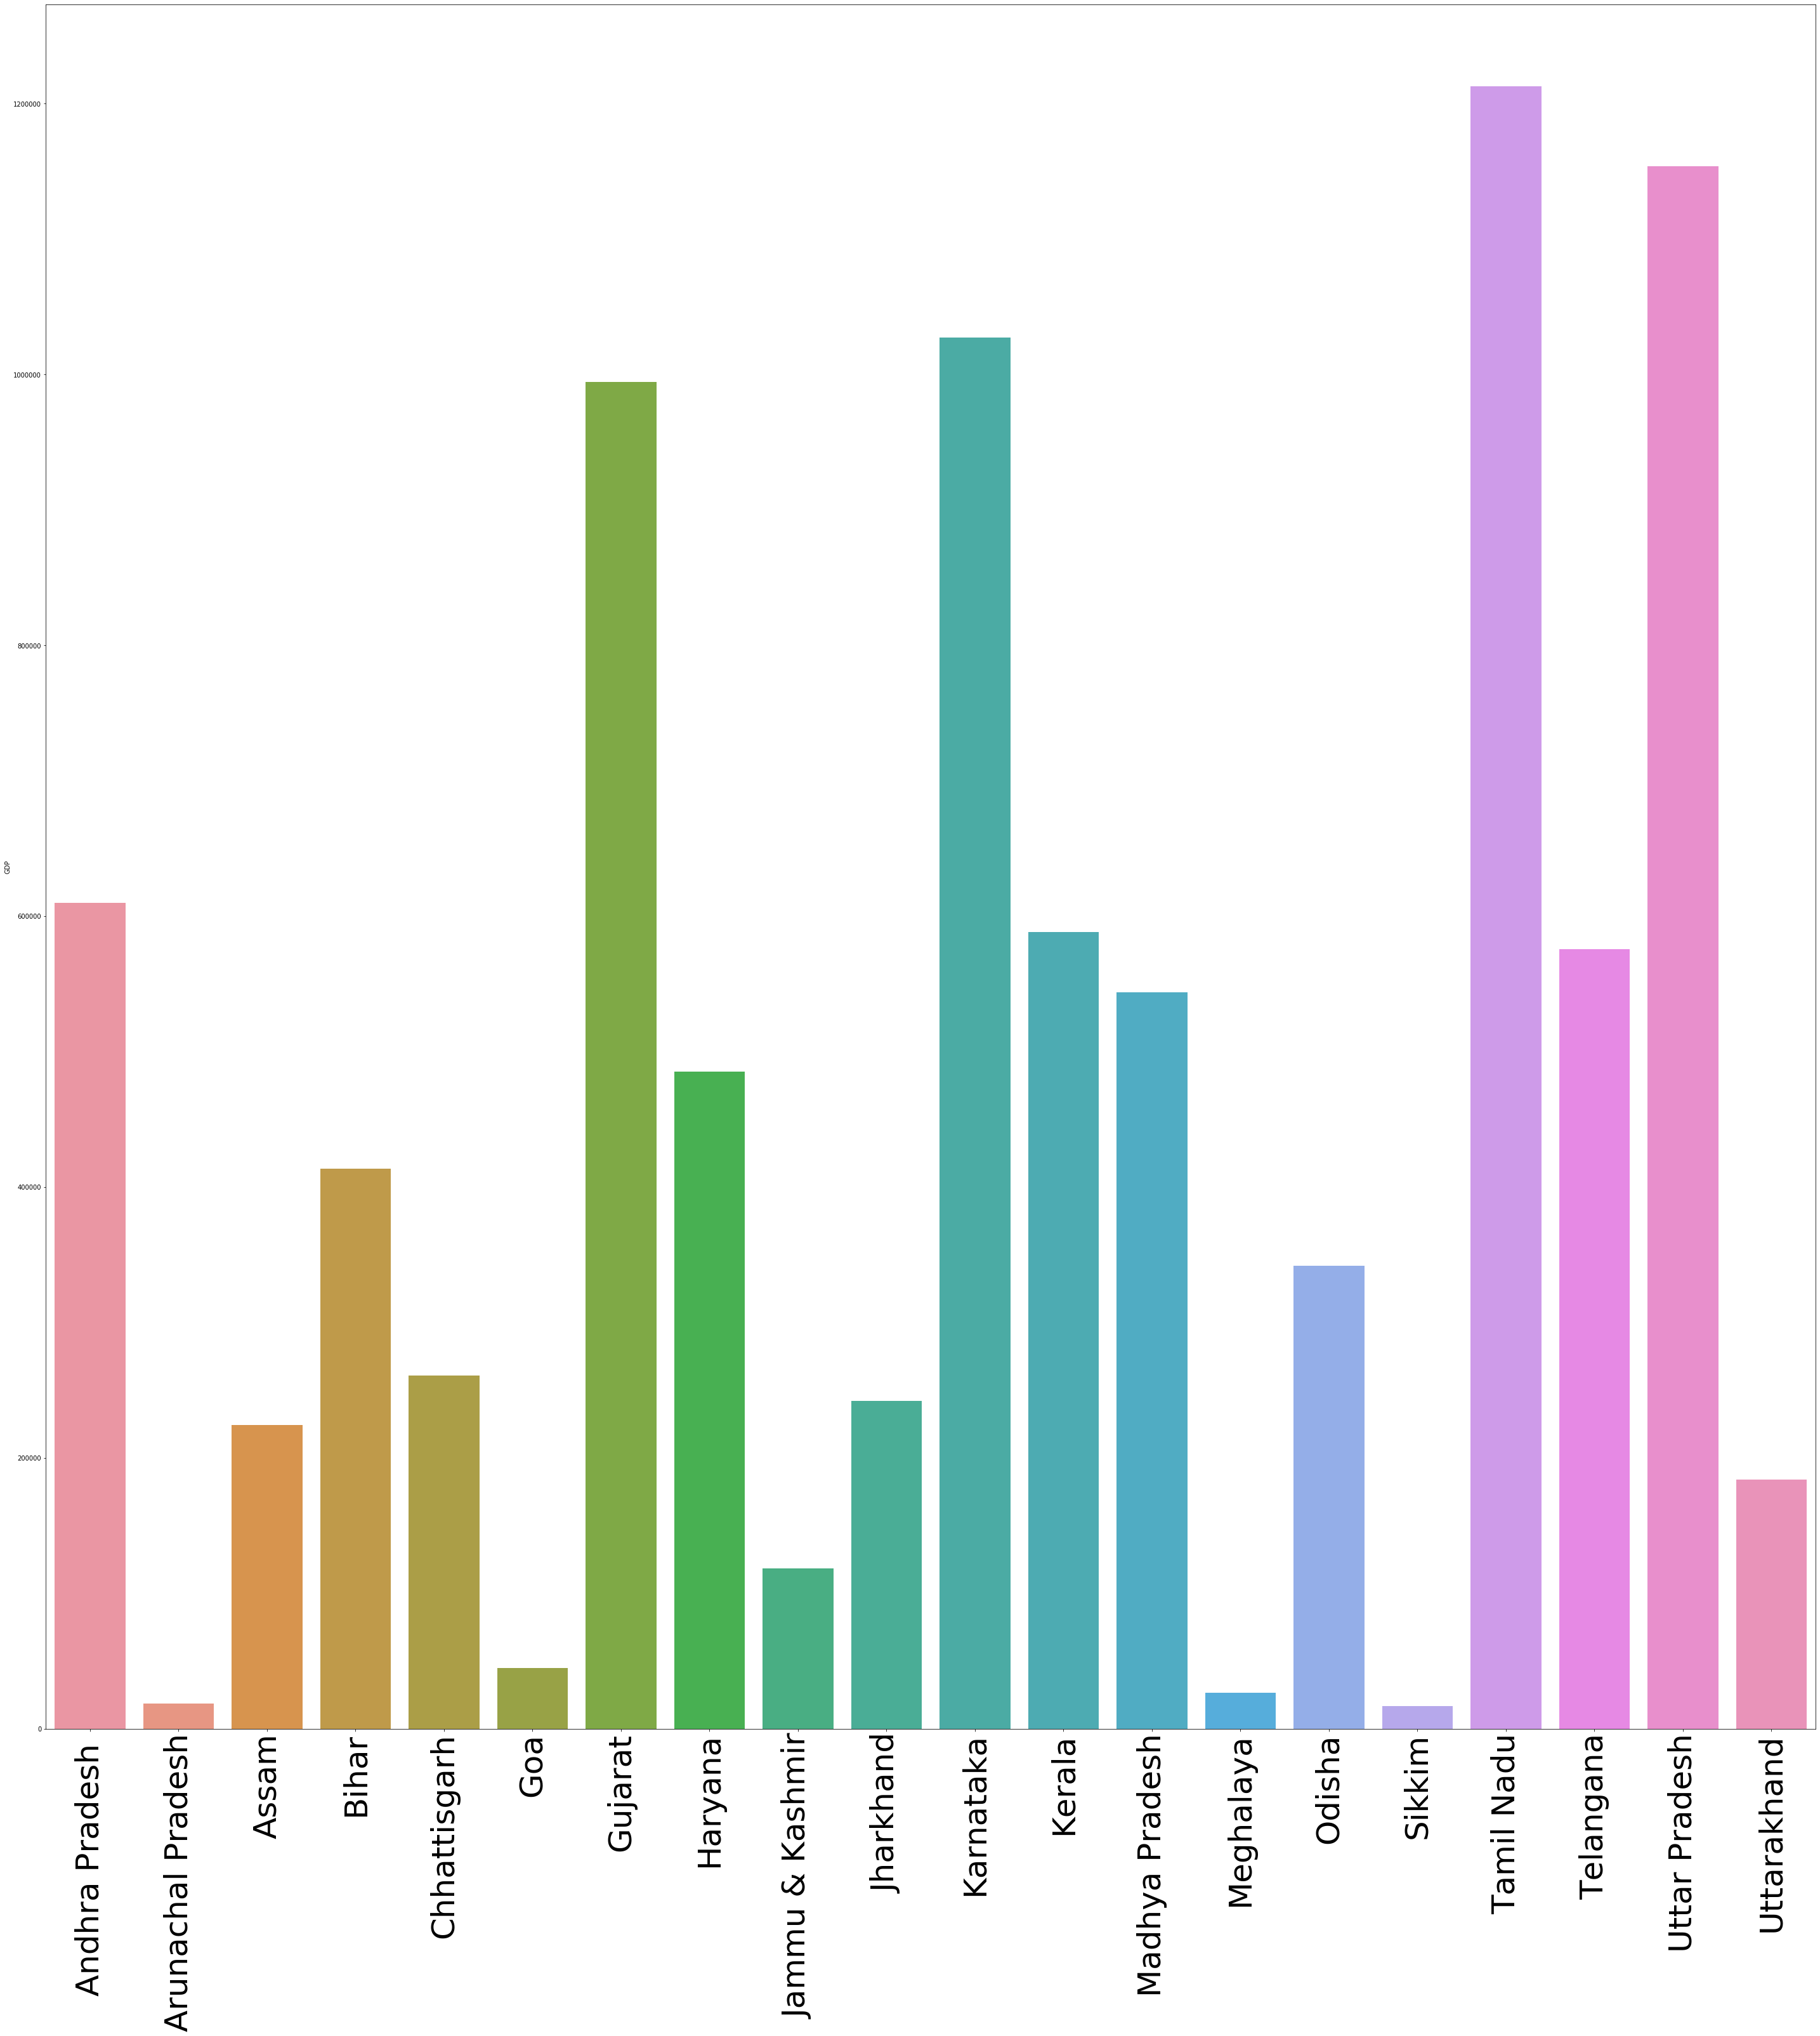

In [655]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the excel file
path=r'C:\Users\Anush\Documents\Python\GDP Analysis\GDP Analysis\GSVA'
df=pd.read_csv(path)
#Extracting rows with 2015-16
df=df[df.Duration.str.contains("2015-16")]
df=df[df['Items  Description'].str.contains("GSDP - CURRENT PRICES")]
df.dropna(axis='columns',inplace=True)
df=df.drop(['Chandigarh','Delhi','Puducherry'],axis=1)
df.index=['GDP']
df1=df.T
df2=df1.drop('Items  Description',axis=0)
df3=df2.drop('Duration',axis=0)
df4=df3.drop('All_India GDP',axis=0)
plt.figure(figsize=(50,50))
finalplot=sns.barplot(x=df4.index,y='GDP',data=df4)
finalplot.set_xticklabels(finalplot.get_xticklabels(),rotation=90,fontsize=50)
plt.show()


# From the above we can infer that the top 5 states in the year 2015-16 are:
* TamilNadu
* UttaPradesh
* Karnataka
* Gujarat
* AP

# From the above we can infer that the bottom 5 states in the year 2015-16 are:
* Arunachal Pradesh
* Sikkim
* Meghalaya
* Goa
* Jammu and Kashmir

# PART-1B

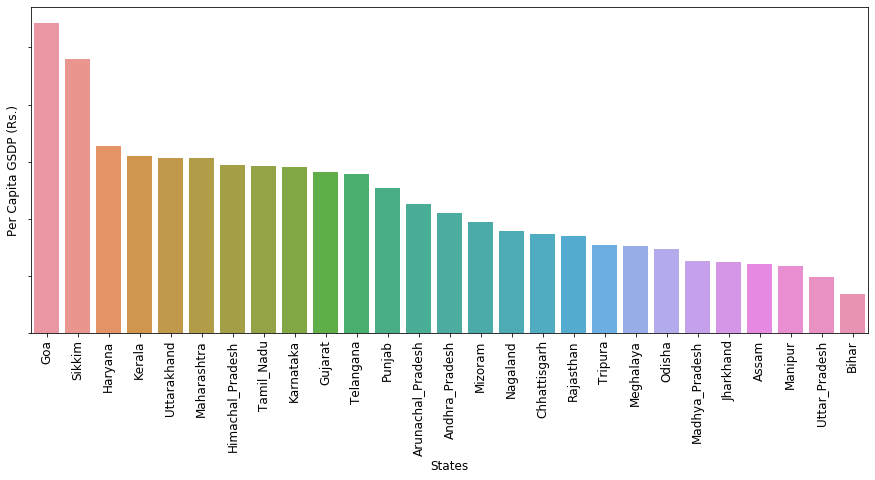

In [657]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
path=r'C:\Users\Anush\Documents\Python\GDP Analysis\GDP Analysis\GSVA'
all_files=glob.glob(path+"/*.csv")
li=[]
for filename in all_files:
    df=pd.read_csv(filename,index_col=None,header=0,encoding='ISO-8859-1')
    df=df[['Item','2014-15']]
    df=df.T
    new_header=df.iloc[0]
    df.columns=new_header
    df=df[1:]
    df.loc[:,'States']=filename.split('\\')[-1].split('.')[0].split('-')[1].strip('*').strip('*')
    li.append(df)
    df.columns=df.columns.str.replace('*',"")
df=pd.concat(li,axis=0,ignore_index=True,sort=False)
#frame=frame[['S.No.','Item','2014-15']]
#frame=frame.T
cols=list(df)
cols_insert_state=cols.insert(0,cols.pop(cols.index('States')))
df=df.loc[:,cols]
df=df.sort_values('Per Capita GSDP (Rs.)',ascending=False)
df=df[['States','Per Capita GSDP (Rs.)']]
plt.figure(figsize=(15,6))
finalplot=sns.barplot(x="States",y="Per Capita GSDP (Rs.)",data=df)
finalplot.set_xlabel("States",fontsize=12)
finalplot.set_ylabel("Per Capita GSDP (Rs.)",fontsize=12)
finalplot.set_xticklabels(finalplot.get_xticklabels(),rotation=90,fontsize=12)
finalplot.set_yticklabels(finalplot.get_yticklabels(),rotation=0,fontsize=12)
plt.show()

# Top 5 states based on GDP per capita
* Goa
* Sikkim
* Haryana
* Kerala
* Uttarkhand

# Bottom 5 states based on GDP per capita
* Jharkhand
* Assam
* Manipur
* Uttar_Pradesh
* Bihar

In [372]:
#Sum of GDP
dfSumGDP=df['Per Capita GSDP (Rs.)'].sum()

#Ration of max and min
dfRatio=(df['Per Capita GSDP (Rs.)'].max()+df['Per Capita GSDP (Rs.)'].min())/dfSumGDP
dfRatio

0.09816803643057197

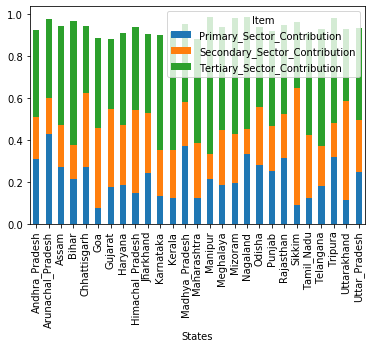

In [658]:
#Primary,Secondary and Tertiary Sectors Percentage distribution
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
path=r'C:\Users\Anush\Documents\Python\GDP Analysis\GDP Analysis\GSVA'
all_files=glob.glob(path+"/*.csv")
li=[]
for filename in all_files:
    df=pd.read_csv(filename,index_col=None,header=0,encoding='ISO-8859-1')
    df=df[['Item','2014-15']]
    df=df.T
    new_header=df.iloc[0]
    df.columns=new_header
    df=df[1:]
    df.loc[:,'States']=filename.split('\\')[-1].split('.')[0].split('-')[1].strip('*').strip('*')
    li.append(df)
    df.columns=df.columns.str.replace('*',"")
df=pd.concat(li,axis=0,ignore_index=True,sort=False)
cols=list(df)
cols_insert_state=cols.insert(0,cols.pop(cols.index('States')))
df=df.loc[:,cols]
#Contribution by Primary,Secondary and Tertiary
df['Primary_Sector_Contribution']=df['Primary']/df['Gross State Domestic Product']
df['Secondary_Sector_Contribution']=df['Secondary']/df['Gross State Domestic Product']
df['Tertiary_Sector_Contribution']=df['Tertiary']/df['Gross State Domestic Product']
df=df[['States','Primary_Sector_Contribution','Secondary_Sector_Contribution','Tertiary_Sector_Contribution']]
df.plot(x='States',kind='bar',stacked=True)

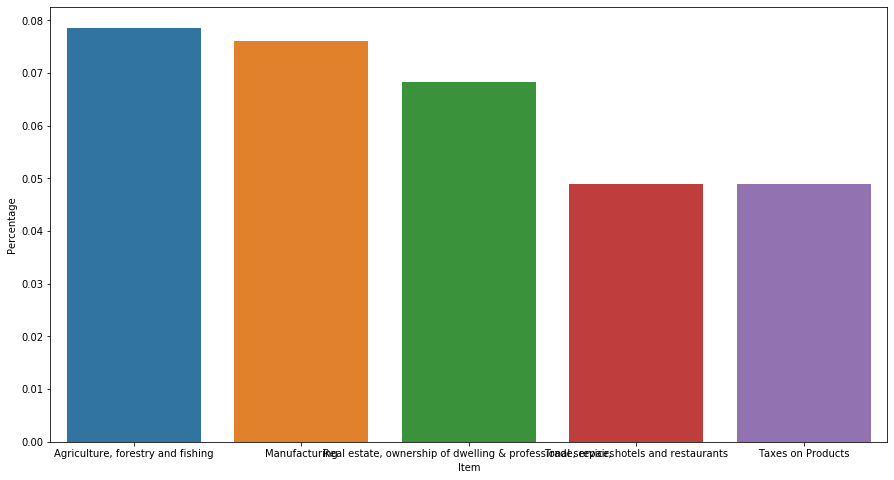

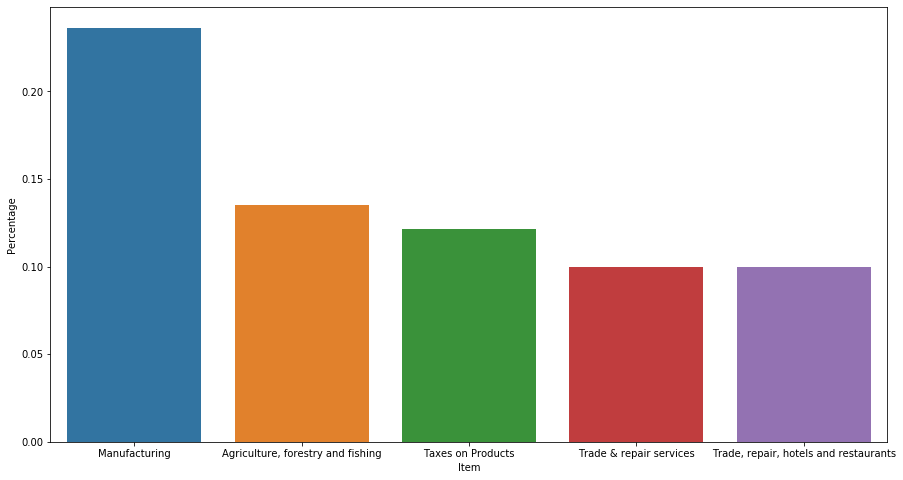

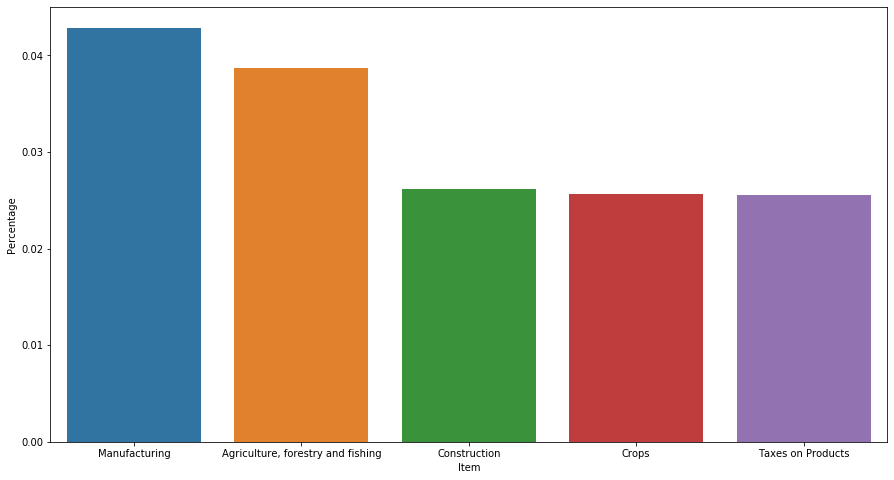

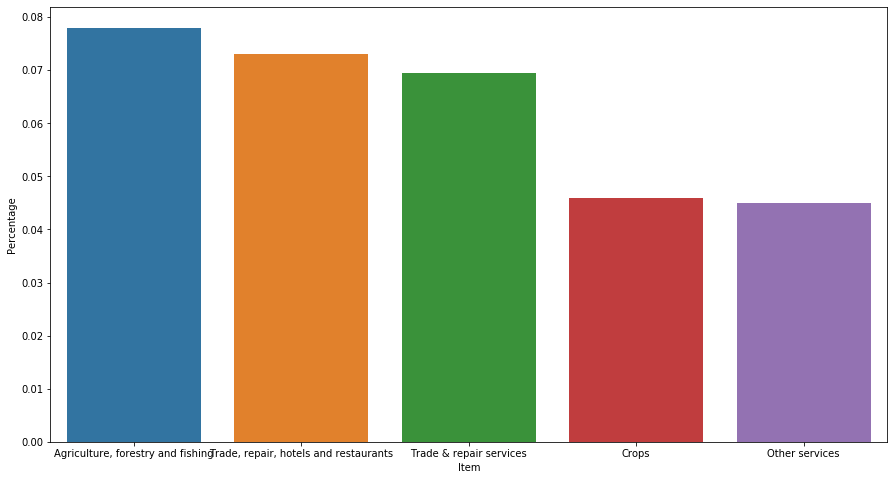

In [844]:
#Categorizing to C1,C2,C3,C4
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
path=r'C:\Users\Anush\Documents\Python\GDP Analysis\GDP Analysis\GSVA'
all_files=glob.glob(path+"/*.csv")
li=[]
for filename in all_files:
    df=pd.read_csv(filename,index_col=None,header=0,encoding='ISO-8859-1')
    df=df[['Item','2014-15']]
    df=df.T
    new_header=df.iloc[0]
    df.columns=new_header
    df=df[1:]
    df.loc[:,'States']=filename.split('\\')[-1].split('.')[0].split('-')[1].strip('*').strip('*')
    li.append(df)
    df.columns=df.columns.str.replace('*',"")
df=pd.concat(li,axis=0,ignore_index=True,sort=False)
#frame=frame[['S.No.','Item','2014-15']]
#frame=frame.T
cols=list(df)
cols_insert_state=cols.insert(0,cols.pop(cols.index('States')))
df=df.loc[:,cols]
df['Categories']=pd.qcut(df["Per Capita GSDP (Rs.)"],q=[0,0.2,0.5,0.85,1],labels=['C4','C3','C2','C1'])
df1=df.groupby('Categories')
c1=df1.get_group('C1')
c2=df1.get_group('C2')
c3=df1.get_group('C3')
c4=df1.get_group('C4')

# #For C1 category

subsectors_c1=c1.T
subsectors_c1=subsectors_c1.drop('States',axis=0)
subsectors_c1=subsectors_c1.drop('Categories',axis=0)
subsectors_c1=subsectors_c1.drop('Gross State Domestic Product',axis=0)
subsectors_c1=subsectors_c1.drop('TOTAL GSVA at basic prices',axis=0)
subsectors_c1=subsectors_c1.drop('Tertiary',axis=0)
subsectors_c1=subsectors_c1.drop('Secondary',axis=0)
subsectors_c1=subsectors_c1.drop('Primary',axis=0)
#subsectors_c1=subsectors_c1.T
#subsectors_c1.index=['State1','State2','State3','State4']
subsectors_c1=subsectors_c1.fillna(0)
subsectors_c1['Total']=subsectors_c1.sum(axis=1)
divider=101930677
subsectors_c1['Percentage']=subsectors_c1.iloc[:,1].div(divider)
#subsectors_c1['Percentage']=subsectors_c1['Percentage'].apply(lambda x:x*100)
subsectors_c1=subsectors_c1.sort_values(by='Percentage',ascending=False)
#subsectors_c1['Cumsum']=subsectors_c1.cumsum(axis=1)
#subsectors_c1=subsectors_c1.T
subsectors_c1=subsectors_c1.head(5)
subsectors_c1

plt.figure(figsize=(15,8))
finalplot=sns.barplot(x=subsectors_c1.index,y='Percentage',data=subsectors_c1)
#finalplot.set_xticklabels(finalplot.get_xticklabels(),rotation=90,fontsize=50)
plt.show()

#For C2 category

subsectors_c2=c2.T
subsectors_c2=subsectors_c2.drop('States',axis=0)
subsectors_c2=subsectors_c2.drop('Categories',axis=0)
subsectors_c2=subsectors_c2.drop('Gross State Domestic Product',axis=0)
subsectors_c2=subsectors_c2.drop('TOTAL GSVA at basic prices',axis=0)
subsectors_c2=subsectors_c2.drop('Tertiary',axis=0)
subsectors_c2=subsectors_c2.drop('Secondary',axis=0)
subsectors_c2=subsectors_c2.drop('Primary',axis=0)
#subsectors_c1=subsectors_c1.T
#subsectors_c1.index=['State1','State2','State3','State4']
subsectors_c2=subsectors_c2.fillna(0)
subsectors_c2['Total']=subsectors_c2.sum(axis=1)
divider=101930677
subsectors_c2['Percentage']=subsectors_c2.iloc[:,1].div(divider)
#subsectors_c2['Percentage']=subsectors_c2['Percentage'].apply(lambda x:x*100)
subsectors_c2=subsectors_c2.sort_values(by='Percentage',ascending=False)
#subsectors_c1['Cumsum']=subsectors_c1.cumsum(axis=1)
#subsectors_c1=subsectors_c1.T
subsectors_c2=subsectors_c2.head(5)
subsectors_c2
plt.figure(figsize=(15,8))
finalplot=sns.barplot(x=subsectors_c2.index,y='Percentage',data=subsectors_c2)
#finalplot.set_xticklabels(finalplot.get_xticklabels(),rotation=90,fontsize=50)
plt.show()

#For C3 category

subsectors_c3=c3.T
subsectors_c3=subsectors_c3.drop('States',axis=0)
subsectors_c3=subsectors_c3.drop('Categories',axis=0)
subsectors_c3=subsectors_c3.drop('Gross State Domestic Product',axis=0)
subsectors_c3=subsectors_c3.drop('TOTAL GSVA at basic prices',axis=0)
subsectors_c3=subsectors_c3.drop('Tertiary',axis=0)
subsectors_c3=subsectors_c3.drop('Secondary',axis=0)
subsectors_c3=subsectors_c3.drop('Primary',axis=0)
#subsectors_c1=subsectors_c1.T
#subsectors_c1.index=['State1','State2','State3','State4']
subsectors_c3=subsectors_c3.fillna(0)
subsectors_c3['Total']=subsectors_c3.sum(axis=1)
divider=101930677
subsectors_c3['Percentage']=subsectors_c3.iloc[:,1].div(divider)
#subsectors_c3['Percentage']=subsectors_c3['Percentage'].apply(lambda x:x*100)
subsectors_c3=subsectors_c3.sort_values(by='Percentage',ascending=False)
#subsectors_c1['Cumsum']=subsectors_c1.cumsum(axis=1)
#subsectors_c1=subsectors_c1.T
subsectors_c3=subsectors_c3.head(5)
subsectors_c3
plt.figure(figsize=(15,8))
finalplot=sns.barplot(x=subsectors_c3.index,y='Percentage',data=subsectors_c3)
#finalplot.set_xticklabels(finalplot.get_xticklabels(),rotation=90,fontsize=50)
plt.show()

# #For C4 category

subsectors_c4=c4.T
subsectors_c4=subsectors_c4.drop('States',axis=0)
subsectors_c4=subsectors_c4.drop('Categories',axis=0)
subsectors_c4=subsectors_c4.drop('Gross State Domestic Product',axis=0)
subsectors_c4=subsectors_c4.drop('TOTAL GSVA at basic prices',axis=0)
subsectors_c4=subsectors_c4.drop('Tertiary',axis=0)
subsectors_c4=subsectors_c4.drop('Secondary',axis=0)
subsectors_c4=subsectors_c4.drop('Primary',axis=0)
#subsectors_c1=subsectors_c1.T
#subsectors_c1.index=['State1','State2','State3','State4']
subsectors_c4=subsectors_c4.fillna(0)
subsectors_c4['Total']=subsectors_c4.sum(axis=1)
divider=101930677
subsectors_c4['Percentage']=subsectors_c4.iloc[:,1].div(divider)
#subsectors_c4['Percentage']=subsectors_c4['Percentage'].apply(lambda x:x*100)
subsectors_c4=subsectors_c4.sort_values(by='Percentage',ascending=False)
#subsectors_c1['Cumsum']=subsectors_c1.cumsum(axis=1)
#subsectors_c1=subsectors_c1.T
subsectors_c4=subsectors_c4.head(5)
subsectors_c4
plt.figure(figsize=(15,8))
finalplot=sns.barplot(x=subsectors_c4.index,y='Percentage',data=subsectors_c4)
#finalplot.set_xticklabels(finalplot.get_xticklabels(),rotation=90,fontsize=50)
plt.show()

# From the above plots we could infer the below,

The Top 3 sub sectors contributing are

    * Agriculture,Forestry and Fishing
    * Manufacturing
    * Trade, repair, hotels and restaurants

# * In C1 category states

    Top 5 sectors contributing to the 80% of GDP are 
    
    * Agriculture,Forestry and Fishing
    * Manufacturing
    * Real estate, ownership of dwelling & professional services
    * Trade, repair, hotels and restaurants
    * Taxes on Products
    
    
# * In C2 category states

    Top 5 sectors contributing to the 80% of GDP are
    
    * Manufacturing
    * Agriculture,Forestry and Fishing
    * Taxes on Products
    * Trade & repair services
    * Trade, repair, hotels and restaurants
    
# * In C3 category states

    Top 5 sectors contributing to the 80% of GDP are
    
    * Manufacturing
    * Agriculture,Forestry and Fishing
    * Construction Items
    * Crops
    * Taxes on Products
    
# * In C4 category states

    Top 5 sectors contributing to the 80% of GDP are
    
    * Agriculture,Forestry and Fishing
    * Trade, repair, hotels and restaurants
    * Trade & repair services
    * Crops
    * Other Services
    
    
## Recommendation: 

#### The Primary sector is contributing more to the GDP in all the categories. The services and tertiary sector needs more focus in order to start contributing more to GDP

# PART-2

# GDP and Education

AttributeError: 'PathCollection' object has no attribute 'plot'

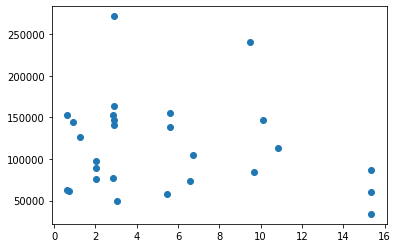

In [839]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
path1=r'C:\Users\Anush\Documents\Python\GDP Analysis\GDP Analysis\GSVA'
path2=r'C:\Users\Anush\Documents\Python\GDP Analysis\GDP Analysis\rs_session243_au570_1.1.csv'
all_files=glob.glob(path1+"/*.csv")
li=[]
for filename in all_files:
    df=pd.read_csv(filename,index_col=None,header=0,encoding='ISO-8859-1')
    df=df[['Item','2014-15']]
    df=df.T
    new_header=df.iloc[0]
    df.columns=new_header
    df=df[1:]
    df.loc[:,'States']=filename.split('\\')[-1].split('.')[0].split('-')[1].strip('*').strip('*')
    li.append(df)
    df.columns=df.columns.str.replace('*',"")
df=pd.concat(li,axis=0,ignore_index=True,sort=False)
#frame=frame[['S.No.','Item','2014-15']]
#frame=frame.T
cols=list(df)
cols_insert_state=cols.insert(0,cols.pop(cols.index('States')))
df=df.loc[:,cols]
df1=df[['States','Per Capita GSDP (Rs.)']]
df1=df1.replace(to_replace="Andhra_Pradesh",value="Andhra Pradesh")
df1=df1.replace(to_replace="Arunachal_Pradesh",value="Arunachal Pradesh")
df1=df1.replace(to_replace="Himachal_Pradesh",value="Himachal Pradesh")
df1=df1.replace(to_replace="Madhya_Pradesh",value="Madhya Pradesh")
df1=df1.replace(to_replace="Tamil_Nadu",value="Tamil Nadu")
df1=df1.replace(to_replace="Uttar_Pradesh",value="Uttar Pradesh")
df1=df1.replace(to_replace="Uttarakhand",value="Uttrakhand")
df2=pd.read_csv(path2)
df2=df2.rename(columns={"Primary - 2014-2015":"Primary - 2013-2014",
                       "Primary - 2014-2015.1":"Primary - 2014-2015"})
df2=df2[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]
df2=df2.drop(df2.index[[0,5,7,8,9,14,18,26]])
df3=df1.join(df2,how='outer')
df3=df3[df3['Level of Education - State']!="West Bengal"]
df3=df3[df3['Level of Education - State']!="All India"]
values={'Primary - 2014-2015':0,'Upper Primary - 2014-2015':0,'Secondary - 2014-2015':0}
df3=df3.fillna(value=values)
df3['Level of Education - State']=df3['Level of Education - State'].shift(-1)
df3=df3.apply(lambda x:pd.Series(x.dropna().values))
df3['Primary - 2014-2015']=df3['Primary - 2014-2015'].shift(-1)
df3['Upper Primary - 2014-2015']=df3['Upper Primary - 2014-2015'].shift(-1)
df3['Secondary - 2014-2015']=df3['Secondary - 2014-2015'].shift(-1)
df3.States=df3.States.replace({"Uttrakhand":"Uttar Pradesh",
                               "Uttar Pradesh":"Uttrakhand"})
df3=df3.drop(df3.index[[34]])
df3=df3.mask(df3==0)
df3 = df3.ffill(axis=0)
df3=df3.drop(df3.index[[27,28,29,30,31,32,33]])
#df3=df3.corr(method="kendall")
#df3=df3.drop(df3.index[0])
#df3=df3.plot.scatter(x=df3.index,y=df3.columns)
df3=plt.scatter(df3['Primary - 2014-2015'],df3['Per Capita GSDP (Rs.)'])
df3.plot(kind="scatter",x=df3['Primary - 2014-2015'],y=df3['Per Capita GSDP (Rs.)'])
plt.show()

# Inference:

###  When people are well educated the GDP Per capita is better whereas if people literacy is less the GDP Per capita is also less.

### Hence there is a strong correlation between the droupouts and GDP Per Capita
